<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 12: Sintesis doblemente cargada</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#lib)

1. [PARTE 1](#parte1)

2. [PARTE 2](#parte2)
    
3. [ANEXO](#anexo)
    

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [4]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
from IPython.display import IFrame, display, Math
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay
import scipy.io as sio
import warnings
warnings.filterwarnings('ignore')
#Sintesis
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex
from pytc2.remociones import remover_valor, remover_polo_sigma, remover_valor_en_infinito, remover_polo_infinito, remover_polo_dc 
from pytc2.remociones import remover_polo_jw,remover_valor_en_dc
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion
from pytc2.dibujar import Capacitor, Inductor, dibujar_elemento_derivacion, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_puerto_salida
from pytc2.remociones import remover_polo_infinito

Diseñar un filtro con las siguientes caracteristicas:

* Pasa bajos
* Bessel (Retardo Cte.)
* Orden 3
* No disipativo
* Que respete la siguiente topología:

<img src="./rsc/consigna1.png" align="center" width="443" height="184" /> 

<a name="1">
   <h3> 1) Impedancia de entrada al cuadripolo A cargado con un resistor de 1 Ohm a la salida</h3>
</a>

En primer lugar planteamos la transferencia de tensión de un filtro Bessell de tercer orden:

\begin{equation}
H(s)|_{B_{n=3}} = \frac{15}{s³+6s²+15s+15}
\end{equation}

En redes no disipativas se cumple:

\begin{equation}
|s_{11}|²+|s_{21}|² = 1
\end{equation}

Calculamos los parámetros s por definición:

La transferencia directa de potencia se calcula como:

\begin{equation}
s_{21} = \frac{b_2}{a_1}|_{a_2=0} = 2\frac{V_2}{V_{g1}}\sqrt{\frac{R_{01}}{R_{02}}} = 2\frac{V_2}{V_{g1}}
\end{equation}

como la salida está adaptada:

\begin{equation}
V_g = 2 V_1 
\end{equation}

entonces:

\begin{equation}
s_{21} = \frac{V_2}{V_1} = \frac{15}{s³+6s²+15s+15}
\end{equation}





Utilizando la herramienta de calculo simbólico "sympy" calculamos S11.

Por propiedad del modulo de la transferencia se cumple que:

\begin{equation}
|s_{21}|²= s_{21}(s) * s_{21}(-s) 
\end{equation}

In [12]:
s21  = 15/(s**3+6*s**2+15*s+15)
display(s21)
_s21 = s21.subs(s,-s)
display(_s21)

15/(s**3 + 6*s**2 + 15*s + 15)

15/(-s**3 + 6*s**2 - 15*s + 15)

In [34]:
s21_2 = sp.expand(s21*_s21)
display(s21_2)

225/(-s**6 + 6*s**4 - 45*s**2 + 225)

Utilizando la condición de redes no disipativas calculamos el modulo del coeficiente de reflexión s11:

\begin{equation}
|s_{11}|²=1-|s_{21}|² 
\end{equation}

In [65]:
s11_2 = 1-s21_2
s11_2 = sp.simplify(s11_2)
display(s11_2)

s**2*(s**4 - 6*s**2 + 45)/(s**6 - 6*s**4 + 45*s**2 - 225)

Separamos numerador del denominador:

In [76]:
num = s**2*(s**4-6*s**2+45)
den = 1/(s11_2/num)
display(num)
display(den)

s**2*(s**4 - 6*s**2 + 45)

s**6 - 6*s**4 + 45*s**2 - 225

Obtenemos las raices y nos quedamos con las que están en el semiplano izquierdo:

In [78]:
roots = sp.solve(num)
roots

[0,
 -sqrt(3)*5**(1/4)*cos(atan(2)/2) - sqrt(3)*5**(1/4)*I*sin(atan(2)/2),
 -sqrt(3)*5**(1/4)*cos(atan(2)/2) + sqrt(3)*5**(1/4)*I*sin(atan(2)/2),
 sqrt(3)*5**(1/4)*cos(atan(2)/2) - sqrt(3)*5**(1/4)*I*sin(atan(2)/2),
 sqrt(3)*5**(1/4)*cos(atan(2)/2) + sqrt(3)*5**(1/4)*I*sin(atan(2)/2)]

In [86]:
sp.expand((s-roots[0])*(s-roots[1]))

s**2 + sqrt(3)*5**(1/4)*s*cos(atan(2)/2) + sqrt(3)*5**(1/4)*I*s*sin(atan(2)/2)

-2.2032026611843234

In [84]:


import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, Inductor

## setear en True para ver logs de dev
dev = True

num = np.array([-1, 0, 6, 0, -45, 0, 0])
den = np.array([-1, 0, 6, 0, -45, 0, 225])
roots_num = np.roots(num)
num_poly_result = np.polymul(np.array([-1, roots_num[0]]), np.array([-1, roots_num[1]]))
roots_den = np.roots(den)
sos_den = np.polymul(np.array([-1, roots_den[1]]), np.array([-1, roots_den[2]])).real
fos_den = np.polymul(-1, roots_den[0]).real

if dev == True:
    print(roots_num)
    print(roots_den)
    #print(num_poly_result)
    #print(num_poly_result.real)
   # print(sos_den)
    #print(fos_den)

    
roots_num[0]


[-2.20320266+1.36165413j -2.20320266-1.36165413j  2.20320266+1.36165413j
  2.20320266-1.36165413j  0.        +0.j          0.        +0.j        ]
[-2.32218535+0.j         -1.83890732+1.75438096j -1.83890732-1.75438096j
  1.83890732+1.75438096j  1.83890732-1.75438096j  2.32218535+0.j        ]


(-2.2032026611843234+1.3616541287161297j)

In [71]:
roots_num

array([-2.20320266+1.36165413j, -2.20320266-1.36165413j,
        2.20320266+1.36165413j,  2.20320266-1.36165413j,
        0.        +0.j        ,  0.        +0.j        ])

<a name="1">
   <h2>Simulación simbólica</h2>
</a>

A continuación se realizará la verificación paso por paso del método gráfico y el algebra realizada a mano (ver anexo al final del documento). Para ello se emplean funciones de la librería de la catedra "PyTc2" para calcular los residuos y las inmitancias obtenidas en cada remoción.

Premisas que condicionan la sintesis:

1)  Red cargada con RL:

\begin{equation}
V_2 = (-I_2)*R_L
\end{equation}

2) Parámetros Z: Normalización a nivel de impedancia

\begin{equation}
\frac{-I_2}{I_1} = \frac{Z_{21}}{R+Z_{22}} = \frac{Z_{21}}{1+Z_{22}} 
\end{equation}

\begin{equation}
\frac{-I_2}{I_1} = \frac{Z_{21}}{1+Z_{22}}
\end{equation}

3) Z22: Sintesis desde la salida

\begin{equation}
Z_{22}=\frac{5s²+43s+68}{s²+5s+4}
\end{equation}


4) Generador de corriente (I1): Primer elemento en derivación.

5) Condición de medición en corto circuito (V2=0): Último elemento en serie.

6) Sintesis disipativa: ZRC
\begin{equation}
Z_{0}>Z{\infty}
\end{equation}

Se procederá a realizar la sintesis de Z22 a partir de los ceros de transmisión de la transferencia que coinciden con los de Z21.

### Resolución simbólica

En primer lugar definimos la función Z22:

In [3]:
s = sp.symbols('s ', complex=True)
Z22 = (5*s**2+43*s+68)/(s**2+5*s+4)
Z22

(5*s**2 + 43*s + 68)/(s**2 + 5*s + 4)

##### 1era remoción TOTAL: Tanque RC serie resonante en 1 rad/s

In [6]:
Z2, Z1, R1, C1 =remover_polo_sigma(Z22, sigma=1, isImpedance=True)
print("Se removió el siguiente tanque RC serie:")
display(Z1)
print("Obteniendo un resistor de valor:")
display(R1)
print("Y un capacitor de valor:")
display(C1)
print("Quedando la impedancia:")
display(Z2)

Se removió el siguiente tanque RC serie:


10/(s + 1)

Obteniendo un resistor de valor:


10

Y un capacitor de valor:


1/10

Quedando la impedancia:


(5*s + 28)/(s + 4)

##### 2da remoción TOTAL: Tanque RC serie resonante en 4 rad/s

In [9]:
Z4, Z3, R2, C2 =remover_polo_sigma(Z2, sigma=4, isImpedance=True)
print("Se removió el siguiente tanque RC serie:")
display(Z3)
print("Obteniendo un resistor de valor:")
display(R2)
print("Y un capacitor de valor:")
display(C2)
print("Quedando la impedancia:")
display(Z4)

Se removió el siguiente tanque RC serie:


8/(s + 4)

Obteniendo un resistor de valor:


2

Y un capacitor de valor:


1/8

Quedando la impedancia:


5

##### 3era remoción TOTAL: Valor constante en infinito (resistor en derivación)

In [15]:
R3 = Z4
print("Finalmente se remueve un resistor en derivación de valor:")
display(R3)

Finalmente se remueve un resistor en derivación de valor:


5

<a name="1">
   <h2>Red Resultante</h2>
</a>
Dibujamos la red utilizando las funciones de la librería de la catedra:

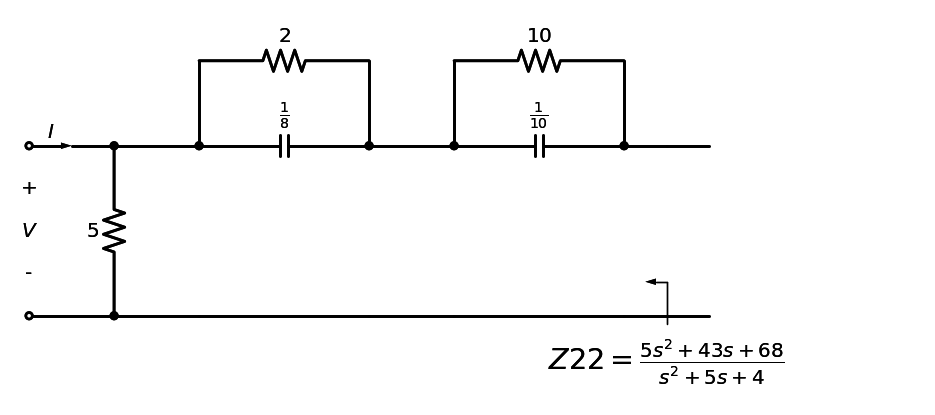

In [27]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d = dibujar_elemento_derivacion(d, Resistor, R3)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, R2, C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, R1, C1)
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z22',  
                                          Z22, 
                                          hacia_entrada=  True,
                                          k_gap_width = 0.5)
display(d)

<a name="1">
   <h2>Simulación circuital</h2>
</a>
Se realiza una simulación circuital en LtSpice para verificar los parámetros de red:

<img src="./rsc/sim/ej1.png" align="center" width="1196" height="599" />   

Analizando la respuesta en frecuencia de la transferencia de corriente, vemos que se comporta como un filtro pasa-altos con una atenuación de 1,58 dB en la banda de paso y frecuencia de corte en 585 mHz.

-----

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1> PARTE 2</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna2.png" align="center" width="1196" height="599" />   

<a name="1">
   <h2>Simulación simbólica</h2>
</a>

Premisas que condicionan la sintesis:

1)  Red cargada con RL:

\begin{equation}
V_2 = (-I_2)*R_L
\end{equation}

2) Parámetros Z: Normalización a nivel de impedancia

\begin{equation}
\frac{-I_2}{I_1} = \frac{Z_{21}}{R+Z_{22}} = \frac{Z_{21}}{1+Z_{22}} 
\end{equation}

\begin{equation}
\frac{-I_2}{I_1} = \frac{Z_{21}}{1+Z_{22}}
\end{equation}

3) Z22: Sintesis desde la salida

\begin{equation}
Z_{22}=\frac{s³+2s}{2s²+1}
\end{equation}


4) Generador de corriente (I1): Primer elemento en derivación.

5) Condición de medición a circuito abierto (-I2=0): Último elemento en derivación.

6) Sintesis No disipativa: 

Se procederá a realizar la sintesis de Z22 a partir de los ceros de transmisión de la transferencia que coinciden con los de Z21.

Primero definimos la función de excitación simbólica

In [29]:
s = sp.symbols('s ', complex=True)
Z22 = (s**3+2*s)/(2*s**2+1)
Z22

(s**3 + 2*s)/(2*s**2 + 1)

##### 1ra remoción TOTAL:  Inductor en derivación (polo de admitancia en 0)

In [37]:
Y=1/Z22
Y2, Y1 = remover_polo_dc(Y)
L1 = 1/Y1/s
print("Se removió un inductor de valor:")
display(L1)
print("La admitancia resultante es igual a: ")
display(Y2)

Se removió un inductor de valor:


2

La admitancia resultante es igual a: 


3*s/(2*(s**2 + 2))

##### 2da remoción TOTAL: Inductor en serie (polo de impedancia en infinito)

In [41]:
Z2 = 1/Y2
Z4, Z3 = remover_polo_infinito(Z2)
L2 = Z3/s
print("Se removió un inductor en serie de valor: ")
display(L2)
print("Quedando una impedancia resultante: ")
display(Z4)

Se removió un inductor en serie de valor: 


2/3

Quedando una impedancia resultante: 


4/(3*s)

##### 3ra remoción TOTAL: Capacitor en derivación (Polo de admitancia en infinito)

In [45]:
Y4 = 1/Z4
Y6, Y5 = remover_polo_infinito(Y4)
C1 = Y5/s
print("Se removió un capacitor de valor: ")
display(C1)
print("Quedando una admitancia resultante: ")
display(Y6)

Se removió un capacitor de valor: 


3/4

Quedando una admitancia resultante: 


0

### Red resultante:

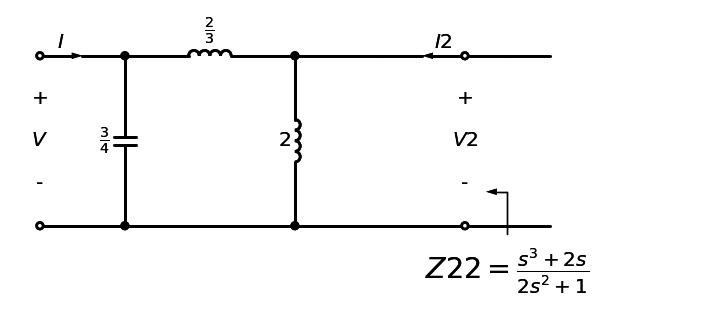

In [49]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')


d = dibujar_elemento_derivacion(d, Capacitor, C1)
d = dibujar_elemento_serie(d, Inductor, L2)
d = dibujar_elemento_derivacion(d, Inductor, L1)
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_salida(d, 
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z22',  
                                          Z22, 
                                          hacia_entrada= True,
                                          k_gap_width = 0.5)
display(d)

### Simulación Circuital:

Procedemos a simular la transimpedancia que presenta el circuito:

<img src="./rsc/sim/ej2.png" align="center" width="1196" height="599" />   

Se observa que se comporta como un filtro pasa-altos con una atenuación de 1,58 dB en la banda de paso y una frecuencia de corte en 598 mHz

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="anexo">
        <h1> ANEXO </h1>
    </a> 
</center>
</div>


In [2]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

------------------------